# Step-0 :Download And Extract Data from STL-10 Dataset

In [1]:
from __future__ import print_function

import os, sys, tarfile, errno
import numpy as np
import matplotlib.pyplot as plt
    
import urllib.request as urllib 

try:
    from imageio import imsave
except:
    from scipy.misc import imsave


# image shape
HEIGHT = 96
WIDTH = 96
DEPTH = 3

# size of a single image in bytes
SIZE = HEIGHT * WIDTH * DEPTH

# path to the directory with the data
DATA_DIR = './data'

# url of the binary data
DATA_URL = 'http://ai.stanford.edu/~acoates/stl10/stl10_binary.tar.gz'

def read_labels(path_to_labels):
    
    with open(path_to_labels, 'rb') as f:
        labels = np.fromfile(f, dtype=np.uint8)
        return labels


def read_all_images(path_to_data):
    
    with open(path_to_data, 'rb') as f:
        everything = np.fromfile(f, dtype=np.uint8)

        images = np.reshape(everything, (-1, 3, 96, 96))

        images = np.transpose(images, (0, 3, 2, 1))
        return images

# Function to read a single image
def read_single_image(image_file):
    image = np.fromfile(image_file, dtype=np.uint8, count=SIZE)
    image = np.reshape(image, (3, 96, 96))
    image = np.transpose(image, (2, 1, 0))
    return image

# Plotting function using matlplotlib
def plot_image(image):
    plt.imshow(image)
    plt.show()

# To save images in our directory
def save_image(image, name):
    imsave("%s.png" % name, image, format="png")

# Using the website to download our data using urllib function
def download_and_extract():
    dest_directory = DATA_DIR
    if not os.path.exists(dest_directory):
        os.makedirs(dest_directory)
    filename = DATA_URL.split('/')[-1]
    filepath = os.path.join(dest_directory, filename)
    if not os.path.exists(filepath):
        def _progress(count, block_size, total_size):
            sys.stdout.write('\rDownloading %s %.2f%%' % (filename,
                float(count * block_size) / float(total_size) * 100.0))
            sys.stdout.flush()
        filepath, _ = urllib.urlretrieve(DATA_URL, filepath, reporthook=_progress)
        print('Downloaded', filename)
        tarfile.open(filepath, 'r:gz').extractall(dest_directory)
        os.remove(filepath)

# As stated in the assignment, using 25000 unlabelled images for unsupervised learning
def save_images(images, labels, dir):
    i=0
    print("Saving images to disk")
    for image in images:
        label = labels[i]
        directory = dir + str(label) + '/'
        try:
            os.makedirs(directory, exist_ok=True)
        except OSError as exc:
            if exc.errno == errno.EEXIST:
                pass
        filename = directory + str(i)
        print(filename)
        save_image(image, filename)
        i= i+1
        if i == 25000:
          break


def save_unlabelled_images(images, dir):
    print("Saving images to disk")
    i = 0
    for image in images:
        directory = dir 
        try:
            os.makedirs(directory, exist_ok=True)
        except OSError as exc:
            if exc.errno == errno.EEXIST:
                pass
        filename = directory + str(i)
        print(filename)
        save_image(image, filename)
        i = i+1
        if i == 25000:
          break


## Download Data And Extract Training Data

In [2]:
download_and_extract()

In [3]:
def extract_data(DATA_PATH,LABEL_PATH = None, dir  = './img/' ):
  with open(DATA_PATH) as f:
    image = read_single_image(f)
    plot_image(image)

  images = read_all_images(DATA_PATH)
  print(images.shape)
  
  if LABEL_PATH:
    labels = read_labels(LABEL_PATH)
    print(labels.shape)
    save_images(images, labels, dir)
  else :
    save_unlabelled_images(images,dir)



In [4]:
DATA_PATH = './data/stl10_binary/train_X.bin'

LABEL_PATH = './data/stl10_binary/train_y.bin'

extract_data(DATA_PATH,LABEL_PATH, dir  = './img/' )

FileNotFoundError: [Errno 2] No such file or directory: './data/stl10_binary/train_X.bin'

## Extract Testing Data

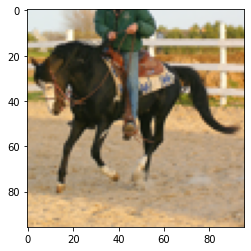

Streaming output truncated to the last 5000 lines.
./testimg/5/3000
./testimg/5/3001
./testimg/10/3002
./testimg/5/3003
./testimg/6/3004
./testimg/1/3005
./testimg/7/3006
./testimg/3/3007
./testimg/6/3008
./testimg/9/3009
./testimg/8/3010
./testimg/7/3011
./testimg/5/3012
./testimg/2/3013
./testimg/10/3014
./testimg/9/3015
./testimg/3/3016
./testimg/5/3017
./testimg/3/3018
./testimg/10/3019
./testimg/3/3020
./testimg/8/3021
./testimg/1/3022
./testimg/4/3023
./testimg/3/3024
./testimg/1/3025
./testimg/7/3026
./testimg/6/3027
./testimg/4/3028
./testimg/8/3029
./testimg/9/3030
./testimg/5/3031
./testimg/8/3032
./testimg/2/3033
./testimg/5/3034
./testimg/2/3035
./testimg/3/3036
./testimg/8/3037
./testimg/2/3038
./testimg/4/3039
./testimg/8/3040
./testimg/3/3041
./testimg/5/3042
./testimg/5/3043
./testimg/8/3044
./testimg/8/3045
./testimg/7/3046
./testimg/1/3047
./testimg/3/3048
./testimg/4/3049
./testimg/2/3050
./testimg/1/3051
./testimg/3/3052
./testimg/2/3053
./testimg/1/3054
./testimg/7

In [ ]:
DATA_PATH = './data/stl10_binary/test_X.bin'
LABEL_PATH = './data/stl10_binary/test_y.bin'

# Testing Data
extract_data(DATA_PATH,LABEL_PATH, dir  = './testimg/' )


## Extract Unlabelled Data

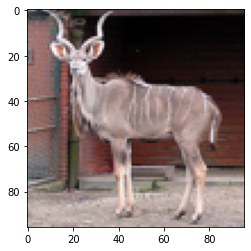

Streaming output truncated to the last 5000 lines.
./unlabelledimg/20000
./unlabelledimg/20001
./unlabelledimg/20002
./unlabelledimg/20003
./unlabelledimg/20004
./unlabelledimg/20005
./unlabelledimg/20006
./unlabelledimg/20007
./unlabelledimg/20008
./unlabelledimg/20009
./unlabelledimg/20010
./unlabelledimg/20011
./unlabelledimg/20012
./unlabelledimg/20013
./unlabelledimg/20014
./unlabelledimg/20015
./unlabelledimg/20016
./unlabelledimg/20017
./unlabelledimg/20018
./unlabelledimg/20019
./unlabelledimg/20020
./unlabelledimg/20021
./unlabelledimg/20022
./unlabelledimg/20023
./unlabelledimg/20024
./unlabelledimg/20025
./unlabelledimg/20026
./unlabelledimg/20027
./unlabelledimg/20028
./unlabelledimg/20029
./unlabelledimg/20030
./unlabelledimg/20031
./unlabelledimg/20032
./unlabelledimg/20033
./unlabelledimg/20034
./unlabelledimg/20035
./unlabelledimg/20036
./unlabelledimg/20037
./unlabelledimg/20038
./unlabelledimg/20039
./unlabelledimg/20040
./unlabelledimg/20041
./unlabelledimg/20042
./u

In [ ]:
DATA_PATH = './data/stl10_binary/unlabeled_X.bin'
LABEL_PATH = None
# Unlabelled Data
extract_data(DATA_PATH,LABEL_PATH, dir  = './unlabelledimg/' )

## Load Unlabelled Images For Unsupervised Learning

We will now create a **function to load images** from our directory to apply machine learning. We will also convert our images to numpy array to process.

In [ ]:
import cv2
import numpy as np

# Load images in RAM and grascaling them
def load_images(image_dir,directory_root):
  images = []
  for image in image_dir:
     image_file = f"{directory_root}/{image}"
     img = cv2.imread(image_file)
     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
     images.append(gray)
  return images

# Convert image from list to nump array
def cvt_image(images):
  return np.array(images, dtype=np.float32)



directory_root = "unlabelledimg"
image_dir = os.listdir(directory_root)[:2]

images = load_images(image_dir,directory_root)


### Test Loaded Image 

Here, we will test our loaded images from the stl-10 dataset to validate our extracting and loading function.

(-0.5, 95.5, 95.5, -0.5)

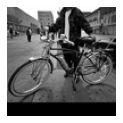

In [ ]:
# Use matplotlib for images
plt.figure(figsize=[2,2])
plt.imshow(images[0],cmap='gray'); plt.axis("off")

# Step-1 : Image Standardization

Our main preprocessing step on our image before applying Principal Component Analysis and Gaussian Mixture Model is to standardize our image data. Our data will have **zero** mean and standard deviation **one**.

The formula for standard deviation of our image is as follows:

$$
z=\frac{x-\mu}{\partial} \ $$

In [ ]:
# Function to standardize images
def image_standardize(dataset):
  
  mean = np.mean(dataset, axis=(0,1,2), keepdims=True)
  std = np.std(dataset, axis=(0,1,2), keepdims=True)
  standardized_images_out = (dataset - mean) / std
  
  return standardized_images_out


# Step-2 : Apply PCA for Whitening, Dimensionality Reduction and Visualization

We will now apply PCA for:


*   Visualization
*   Whitening
*   Dimensionality Reduction And Reconstruction

We will implement PCA using the steps below:



**1- Find covariance of our data:** 

$$
Cov=\frac{1}{m} \ (X^T*X) $$  

> where:




> X : (m,n)




**2- Calculate eigen vectors using our covariance. We will use built-in function svd from scipy:**

scipy.linalg.svd(a, full_matrices=True, compute_uv=True, overwrite_a=False, check_finite=True, lapack_driver='gesdd')

**Parameters:**

a: **(M, N) array_like**

Matrix to decompose.

full_matrices: **bool , optional**

If True (default), U and Vh are of shape (M, M), (N, N). If False, the shapes are (M, K) and (K, N), 
where K = min(M, N).

compute_uvbool: **optional**

Whether to compute also U and Vh in addition to s. Default is True.

overwrite_abool: **optional**

Whether to overwrite a; may improve performance. Default is False.

check_finitebool: **optional**

Whether to check that the input matrix contains only finite numbers. Disabling may give a performance gain, but may result in problems (crashes, non-termination) if the inputs do contain infinities or NaNs.

lapack_driver{‘gesdd’, ‘gesvd’}: **optional**

Whether to use the more efficient divide-and-conquer approach ('gesdd') or general rectangular approach ('gesvd') to compute the SVD. MATLAB and Octave use the 'gesvd' approach. Default is 'gesdd'.

**3- Compute PCA using the u vector calculated i.e. :**

Reduced_data = u[: , :k]^T * X^T

where: 

k : number of components to reduce our data to.





In [ ]:
from scipy.linalg import svd

# Function to find covariance 
def find_covariance(image_data):
  m = image_data.shape[0]
  cov = (1/m) * np.matmul(image_data.T,image_data)
  print("---Found Covaraince---")
  return cov

# Calculate eigen vectors using the covariace
def compute_eigen(cov):
  u, s, _ = svd(cov)
  print("---Found EigenVectors---")
  return (u,s)


In [ ]:
# Function to preprocess our data
def preprocess_data(image_dir, dir_root):
  temp_images = load_images(image_dir,dir_root)
  images = cvt_image(temp_images)
  image_list_standardize = image_standardize(images)
  m = image_list_standardize.shape[0]
  image_data =  image_list_standardize.reshape(m,-1)
  return image_data  

# Calculate PCA using the eigen vectors and covariance
def compute_pca(n_components,X,u):
  print("---Computing PCA---")
  return np.matmul(u[:,:n_components].T,X.T)
  


  

In [ ]:
directory_root = "unlabelledimg"
image_dir = os.listdir(directory_root)

image_data = preprocess_data(image_dir, directory_root)

  

## PCA For Visualization

We will reduce our data to 2 dimensions for visualization of what PCA does to our data. This will also help to validate our manual PCA algorithm with the PCA provided by **scikit-learn**.

Here, our n_components(k) will be **2**.

In [ ]:
cov = find_covariance(image_data)

(u,s) = compute_eigen(cov)

k=2 

X = compute_pca(k,image_data,u)


---Found Covaraince---
---Found EigenVectors---
---Computing PCA---


Here we will create a function to calculate the variance retained by our reduced data. The more the variance retained, the more better result we get after appying machine learning algorithms.

In [ ]:
# Calculate Variance
def calculate_var(s,k):
  var = (s[:k].sum()/s.sum()) * 100
  return var

print("The total variance retained for k=2 is : {}".format(calculate_var(s,k)))



The total variance retained for k=2 is : 31.700387597084045


(2, 25000)


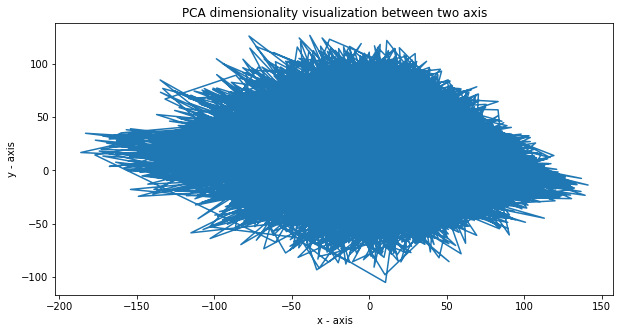

In [ ]:
import matplotlib.pyplot as plt 
  
# # function to show the plot 
# plt.show()
print(X.shape)
# x axis values 
x = X[0,:] 
# corresponding y axis values 
y = X[1,:] 

plt.figure(figsize=[10,5])

# plotting the points  
plt.plot(x,y) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('PCA dimensionality visualization between two axis') 
  
# function to show the plot 
plt.show()


## Apply PCA Using Scikit-Learn For Visualization

(25000, 2)


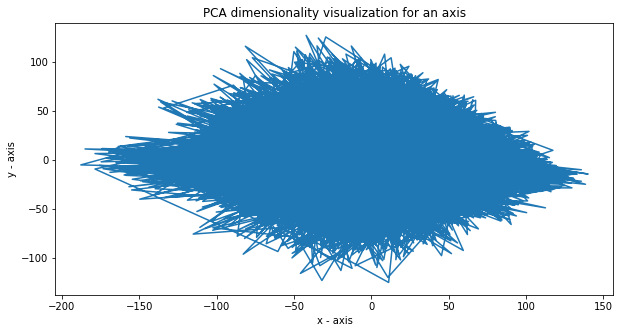

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(image_data)

X = pca.transform(image_data)

print(X.shape)
# x axis values 
x = X[:,0] * -1
# corresponding y axis values 
y = X[:,1] 

# Create figure
plt.figure(figsize=[10,5])

# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('PCA dimensionality visualization for an axis') 
  
# function to show the plot 
plt.show()



In [ ]:
# Delete variables for memory space
del X
del pca
del cov

## Mean Squared Error For Different Dimensionality Reduction And Reconstruction.

To demonstrate our relation between mean-squared error and variance retained, we will use different dimensions (32,64,256,512,1028,2046,4098) and calculate variance and mean squared error after reconstruction.

The demonstration will cover part 1 of our assignment:

**Low Dimensionality Reduction Using PCA:**

**Using STL-10 unlabelled dataset, build a PCA with the minimum dimensionality and best reconstruction quality.**

**Plot MSE vs z-dim**


In [ ]:
# Function to recontruct our reduced dataset
def reconstruct_pca(X,u,k):
  return np.matmul(u[:,:k],X).T

# Function to calculate our mean squared error
def calculate_mse(y,y_hat):
  diff_sq = (y - y_hat)**2
  mse = diff_sq.sum().sum()
  return mse


In [ ]:
# Using different dimensions for plotting
dims = [32,64,256,512,1028,2046,4098]

# Initializing mse and variance
mean_squared_errors = []
variance = []

for k in dims:
  
  X = compute_pca(k,image_data,u)
  y_hat = reconstruct_pca(X,u,k)
  
  # Calculate mean squared error for each k_dim
  mse = calculate_mse(image_data,y_hat)
  
  # Calculate variance for each k-dim
  var = calculate_var(s,k)
  
  # Create a list for each for plotting 
  mean_squared_errors.append(mse)
  variance.append(var)

  print("The variance retained for dim {} is {}".format(k,var))
  print("The mean squared error for dim {} is {} \n".format(k,mse))


---Computing PCA---
The variance retained for dim 32 is 72.4001944065094
The mean squared error for dim 32 is 63592376.0 

---Computing PCA---
The variance retained for dim 64 is 78.58808636665344
The mean squared error for dim 64 is 49335356.0 

---Computing PCA---
The variance retained for dim 256 is 88.33763599395752
The mean squared error for dim 256 is 26872738.0 

---Computing PCA---
The variance retained for dim 512 is 92.05699563026428
The mean squared error for dim 512 is 18303424.0 

---Computing PCA---
The variance retained for dim 1028 is 95.14608383178711
The mean squared error for dim 1028 is 11187255.0 

---Computing PCA---
The variance retained for dim 2046 is 97.56304025650024
The mean squared error for dim 2046 is 5620425.5 

---Computing PCA---
The variance retained for dim 4098 is 99.23264980316162
The mean squared error for dim 4098 is 1771823.25 



Plotting **MSE** with different dimensions

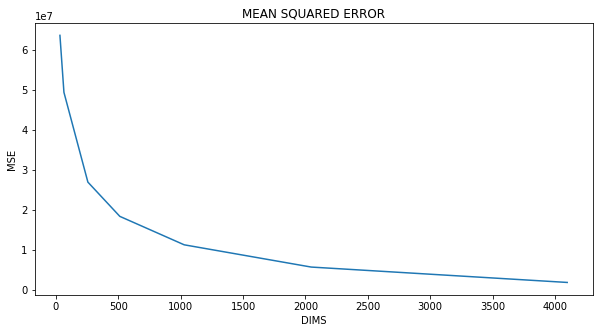

In [ ]:
# Create figure
plt.figure(figsize=[10,5])

# plotting the points  
plt.plot(dims, mean_squared_errors) 
  
# naming the x axis 
plt.xlabel('DIMS') 
# naming the y axis 
plt.ylabel('MSE') 
  
# giving a title to my graph 
plt.title('MEAN SQUARED ERROR') 
  
# function to show the plot 
plt.show()


Plotting **variance** with different dimensions

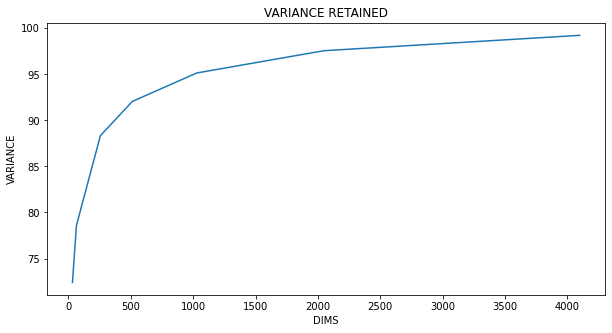

In [ ]:
# Create figure
plt.figure(figsize=[10,5])

# plotting the points  
plt.plot(dims, variance) 
  
# naming the x axis 
plt.xlabel('DIMS') 
# naming the y axis 
plt.ylabel('VARIANCE') 
  
# giving a title to my graph 
plt.title('VARIANCE RETAINED') 
  
# function to show the plot 
plt.show()


## PCA For Whitening Data

We will now select k which retains atleast 99% of variance for us.

In [ ]:
def apply_pca(n_components,image_data):
  cov = find_covariance(image_data)
  (u,s) = computer_eigen(cov)
  out =  np.matmul(u[:,:n_components.T],image_data.T)
  return out 

In [ ]:
from sklearn.decomposition import PCA
def find_best_k(s,var_ret):
  min_k = 0
  for k in range(1,s.shape[0]):
    var = calculate_var(s,k)
    if var >= var_ret:
      print("The variance retained is:{}".format(var))
      return k

k = find_best_k(s,99)
print("The value of k where atleast 99% variance is retained should be k = {}".format(k))

# Apply PCA
image_reduced = compute_pca(k,image_data,u)
  

The variance retained is:99.00018572807312
The value of k where atleast 99% variance is retained should be k = 3621
---Computing PCA---


In [ ]:
# Delete image_data for RAM space
del image_data


# Step-3 : Apply GMM for mapping data from k features to 10 features

We will use **Gaussian Mixture Model** to map our data from k features to 10 features. We will then train our model for prediction of our known(supervised) dataset. This will cover part 2 of our assignment.

Part 2: Using the optimal z-dimension PCA

We can fit a 10-component GMM on the unlabelled dataset z-code vectors form PCA?

Can we use the GMM and labeled training set to assign cluster to the 10 clusters in GMM?

Report the accuracy on the test data set. 

Can we build an STL generative model using unlabeled dataset PCA z-code vectors and GMM?



ALGORITHM:

1 - Initialize the **mean**, 
the **covariance matrix** and 
the **mixing coefficients** 
by some random values. (or other values)

2 - Compute the **gamma** values for all k.

3 - Again Estimate all the parameters 
using the current **gamma** values.

4 - Compute **log-likelihood** function.

5 - Put some convergence criterion

6 - If the log-likelihood value converges to some value 
( or if all the parameters converge to some values ) 
then stop, 
else return to Step 2.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

X_train = image_reduced.T

n_components = 10

del image_reduced


In [ ]:
print("The shape of our training set is: {}".format(X_train.shape))

The shape of our training set is:(25000, 3621)


## Using Scikit-Learn To Apply GMM 

In [ ]:
from sklearn import mixture
import itertools
from scipy import linalg


gmm = mixture.GaussianMixture(n_components=n_components, covariance_type='full',random_state=0)
# gmm.fit(image_reduced_sk)
gmm.fit(X_train)


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=10, n_init=1,
                precisions_init=None, random_state=0, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

# Step-4 : Evaluation

## Load Training Images And Set Label Mapping

Set our label map inorder to match the label of our training dataset to the GMM prediction. For e.g
 
 1->5

 2->8

 3->10

 etc.



In [ ]:
# Use Scikit Learn for prediction
def apply_gmm_with_sk(images, clf = gmm, selected_k=k,u_reduce=u):
  
  whitened_data = compute_pca(selected_k,images,u_reduce).T
  prediction = clf.predict(whitened_data)
  return prediction




In [ ]:
import statistics
from scipy import stats as s

root_dir = 'img'
dir = os.listdir(root_dir)
l= []
map_dict = {}
for i in dir:
  
  # Directory for our training labelled data
  directory_root = f"{root_dir}/{i}"

  im_dir = os.listdir(directory_root)
  
  # Preprocess our training data first 
  images = preprocess_data(im_dir,directory_root)

  # Apply PCA and GMM
  prediction = apply_gmm_with_sk(images)

  # Label mapping our data
  label = int(s.mode(prediction)[0]) 
  map_dict[i] = label


print("The mapping for our labels will be:\n{}".format(map_dict))  
  

(500, 96, 96)
---Computed PCA---
(500, 96, 96)
---Computed PCA---
(500, 96, 96)
---Computed PCA---
(500, 96, 96)
---Computed PCA---
(500, 96, 96)
---Computed PCA---
(500, 96, 96)
---Computed PCA---
(500, 96, 96)
---Computed PCA---
(500, 96, 96)
---Computed PCA---
(500, 96, 96)
---Computed PCA---
(500, 96, 96)
---Computed PCA---
The mapping for our labels will be:
{'4': 2, '9': 5, '10': 6, '1': 4, '2': 4, '3': 1, '7': 2, '6': 2, '5': 2, '8': 2}


## Evaluation Using Test Sets

Finally, we will check the accuracy of our model on the test set

In [ ]:
# Load Test Sets
def load_test_images(root_dir="testimg"):
  dir = os.listdir(root_dir)
  images = []
  labels = []
  for i in dir:
    directory_root = f"{root_dir}/{i}"
    im_dir = os.listdir(directory_root)
    for image in im_dir:
     image_file = f"{root_dir}/{i}/{image}"
     img = cv2.imread(image_file)
     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
     images.append(gray)
     labels.append(i)
  return (images,labels)  

# Process test images
def image_process(images):
  images = cvt_image(images)
  image_list_standardize = image_standardize(images)
  m = image_list_standardize.shape[0]
  image_data =  image_list_standardize.reshape(m,-1)
  return image_data 

# Map labels
def map_labels(labels,map_dict=map_dict):
  mapped_label = []
  for i in labels:
    mapped_label.append(map_dict[i])
  return mapped_label  



In [ ]:
images,labels = load_test_images()
processed_images = image_process(images)
Y_value = np.array(map_labels(labels))
Y_prediction = apply_gmm_with_sk(processed_images)
print(Y_prediction)

---Computed PCA---
[7 8 8 ... 2 4 4]


## Calculating Accuracy

In [ ]:
positives = 0
for i in range(Y_prediction.shape[0]):
  if Y_prediction[i] == Y_value[i]:
    positives = positives+1
acc = (positives/Y_prediction.shape[0]) * 100

print("The total accuracy achieved is {}%".format(acc))

The total accuracy achieved is 19.45%


# Step-5 Using Our Implementation To Apply GMM

In [ ]:
def multivariateGaussian(mu,sigma,X):
  X_norm = X - mu.reshape(-1,1).T
  N = X.shape[1]
  temp1 = (2*np.pi)**(-N/2)  * (np.linalg.det(sigma) ** (-1/2))
  temp2 = np.dot(X_norm,np.linalg.inv(sigma))
  G = temp1 * np.sum(np.exp(-0.5*np.multiply(X_norm,temp2)),axis=1)
  return G


In [ ]:
from scipy.stats import multivariate_normal

def apply_gmm(X_train,n_components,n_loop=100):
  
  m = X_train.shape[0]
  n_dim = X_train.shape[1]
  
  # Initialize parameters
  
  mu_shape = (n_components, n_dim)
  mu = np.random.normal(size=mu_shape)

  # sigma = np.ones((n_components,n_dim,n_dim)) 
  sigma = [np.identity(n_dim) for _ in range(n_components)] 
  # sigma = np.array(sigma,dtype="float32") + 1e+7


  pi = np.random.randint(1,100, size=(n_components,1))
  pi = pi/pi.sum()

  neg_log = []


  # Compute Gaussian distribution
    
  for loop in range(n_loop):
    
    # Compute Gaussian distribution
    multi_var = [ multivariate_normal(mu[i],sigma[i],allow_singular=True) for i in range(n_components)]
    g_val = np.array([multi_var[i].pdf(X_train) for i in range(n_components)])
    print("G_val:{}".format(g_val))

    # Negative log-likelihood
    weighted_g_val = np.array([pi[i]*g_val[i] for i in range(n_components)])
    
    weighted_g_val_log = np.log(weighted_g_val.sum(axis=0)).sum()
    print("weighted_g_val_log:{}".format(weighted_g_val_log))
    neg_log.append(-weighted_g_val_log)
    
    # Compute Responsibilities
    weighted_sum = weighted_g_val.sum(axis=0)
    r = np.divide(weighted_g_val, weighted_sum)
    # print("r:{}".format(r))
    
    dotted = np.dot(r,X_train)
    denom = dotted.sum(axis=1)
    denom = np.reshape(denom,(-1,denom.shape[0])).T
    
    # Update Means
    x_2 = X_train**2
    mu = np.divide(np.dot(r,x_2),denom)
    
    # Update pi
    pi = ((1/n_dim)*denom)
    
    # Update Covariance Matrices
    for c in range(n_components):
            mu_c = mu[c, :]
            n_c = denom[c]

            outer = np.zeros((n_dim, n_dim)).astype(float)
            for i in range(m):
                wic = r[c, i]
                xi = X_train[i, :]
                outer += wic * np.outer(xi - mu_c, xi - mu_c)

            outer = outer / n_c if n_c > 0 else outer
            sigma[c] = outer
    
    mu = np.reshape(mu, mu_shape)
    sigma = np.reshape(np.array(sigma), sigma_shape)
    
    # Means and covs of the sampled and mixed Gaussians
    if loop == n_loop - 1:
        print("mu:", mu)
        print('sigma:', sigma)
        print('pi', pi)
    
    return mu,sigma,pi    

def gmm_predict(mu,sigma,pi,X,n_components):
  
  rv = [multivariate_normal(mu[i], sigma[i]) for i in range(n_components)]

  # Negative log-likelihood
  nll = []
  weighted_g_val = np.array([pi[i]*rv[i].pdf(XX) for i in range(n_components)])
  weighted_g_val = weighted_g_val.sum(axis=0)
  eps = 1e-200
  weighted_g_val[ weighted_g_val < eps ] = eps
  weighted_g_val = -np.log(weighted_g_val)

  Z = weighted_g_val.reshape(X.shape)
  return Z

In [ ]:
mu,sigma,pi = apply_gmm(X_train,n_components,n_loop=100)

G_val:[[0.00662843 0.006629   0.00662824 ... 0.00662824 0.00662548 0.00662842]
 [0.00662973 0.00662965 0.00662972 ... 0.00662422 0.00662886 0.00662973]
 [0.00662947 0.00662968 0.00662938 ... 0.00662629 0.00662769 0.00662947]
 ...
 [0.0066227  0.00662412 0.00662225 ... 0.00662964 0.00661696 0.00662268]
 [0.00662669 0.00662759 0.00662639 ... 0.00662935 0.00662261 0.00662667]
 [0.00662863 0.00662914 0.00662845 ... 0.00662801 0.00662584 0.00662862]]
weighted_g_val_log:-125414.92560574978


In [ ]:
# Use our implementation for prediction
def apply_gmm_on_dataset(images, u_reduce, n_components=10, mu= mu, pi=pi, sigma=sigma):
  whitened_data = compute_pca(n_components,images,u_reduce)
  prediction = gmm_predict(mu,sigma,pi,whitened_data,n_components)
  return prediction




NameError: ignored